In [3]:
import pandas as pd
import numpy as np

from mlchartist.array_builder import full_dataset_randomised_arrays_

In [4]:
apple = pd.read_csv('../raw_data/processed/aapl.csv')
google = pd.read_csv('../raw_data/processed/googl.csv')
amzn = pd.read_csv('../raw_data/processed/amzn.csv')
tsla = pd.read_csv('../raw_data/processed/tsla.csv')
amd = pd.read_csv('../raw_data/processed/amd.csv')
intc = pd.read_csv('../raw_data/processed/intc.csv')

In [5]:
joined_df = pd.DataFrame()
joined_df = joined_df.append(apple)
joined_df = joined_df.append(google)
joined_df = joined_df.append(amzn)
joined_df = joined_df.append(tsla)
joined_df = joined_df.append(amd)
joined_df = joined_df.append(intc)

In [6]:
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff',
              'MACD_signal', '5TD_return', '10TD_return', '20TD_return']
TARGET_COLS=['10TD_return']
outlier_validation={'5TD_return': [-0.5, 0.5]}

stride = 5


train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays_(joined_df, 
                                                                                stride=stride, 
                                                                                input_cols=INPUT_COLS, 
                                                                                outlier_threshold=1, 
                                                                                outlier_validation=outlier_validation, 
                                                                                check_train_outliers=True,
                                                                                check_test_outliers=True, 
                                                                                target_col=TARGET_COLS, 
                                                                                time_window=30,
                                                                                test_set_size='3Y')

print('')
print('')
print('### Stats ###')
print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('test_x', test_x.shape)
print('test_y', test_y.shape)
print('scaler', scaler)



c:\users\owner\.venvs\lewagon\lib\site-packages\mlchartist\preprocessing.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format=('%Y-%m-%d'))


6 Companies in Dataset
Starting AAPL: Company 1 of 6
Starting GOOGL: Company 2 of 6
Starting AMZN: Company 3 of 6
Starting TSLA: Company 4 of 6
Starting AMD: Company 5 of 6
Starting INTC: Company 6 of 6
All Companies Completed

Processing Stats: {'AAPL': {'train_possible_windows': 1672.8, 'train_outliers': 19, 'train_windows': 1654, 'test_possible_windows': 150.2, 'test_outliers': 6, 'test_windows': 145}, 'GOOGL': {'train_possible_windows': 666.6, 'train_outliers': 6, 'train_windows': 661, 'test_possible_windows': 150.2, 'test_outliers': 6, 'test_windows': 145}, 'AMZN': {'train_possible_windows': 1030.6, 'train_outliers': 30, 'train_windows': 1001, 'test_possible_windows': 150.2, 'test_outliers': 6, 'test_windows': 145}, 'TSLA': {'train_possible_windows': 371.6, 'train_outliers': 12, 'train_windows': 360, 'test_possible_windows': 150.2, 'test_outliers': 12, 'test_windows': 139}, 'AMD': {'train_possible_windows': 1747.4, 'train_outliers': 17, 'train_windows': 1731, 'test_possible_window

In [12]:
train_x.shape

(7674, 30, 15)

In [11]:
train_y.shape

(7674, 1)

In [9]:
train_y_5D = train_y[:, 0, 0]

In [13]:
train_y_bin = (train_y > .0006).astype(int)

In [15]:
train_y_bin

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

## Build Model

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam

optim = RMSprop(learning_rate=0.00001)

model = Sequential()

model.add(layers.LSTM(units=10,  activation='tanh')) 
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer=optim, metrics=['accuracy'])

# –– The following returns an error
history = model.fit(train_x, train_y_bin, epochs=10, validation_split=0.1)

Epoch 1/10
216/216 [==============================] - 18s 83ms/step - loss: 0.4205 - accuracy: 0.5038 - val_loss: 0.4128 - val_accuracy: 0.5156
Epoch 2/10
216/216 [==============================] - 18s 83ms/step - loss: 0.4179 - accuracy: 0.5030 - val_loss: 0.4110 - val_accuracy: 0.5117
Epoch 3/10
216/216 [==============================] - 19s 86ms/step - loss: 0.4153 - accuracy: 0.5038 - val_loss: 0.4093 - val_accuracy: 0.5143:  - ETA: 0s - loss: 0.4152 - ac
Epoch 4/10
216/216 [==============================] - 19s 88ms/step - loss: 0.4127 - accuracy: 0.5042 - val_loss: 0.4075 - val_accuracy: 0.5182
Epoch 5/10
216/216 [==============================] - 17s 80ms/step - loss: 0.4102 - accuracy: 0.5036 - val_loss: 0.4058 - val_accuracy: 0.5195
Epoch 6/10
216/216 [==============================] - 17s 79ms/step - loss: 0.4076 - accuracy: 0.5038 - val_loss: 0.4040 - val_accuracy: 0.5221
Epoch 7/10
216/216 [==============================] - 23s 107ms/step - loss: 0.4051 - accuracy: 0.5061 -

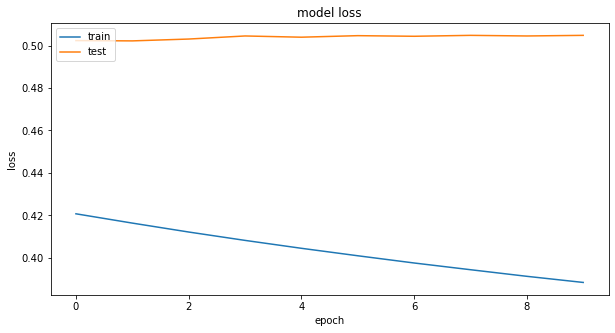

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
history.history

{'loss': [0.42077264189720154,
  0.4163978099822998,
  0.4121972620487213,
  0.40825584530830383,
  0.40453317761421204,
  0.40102046728134155,
  0.3976152539253235,
  0.39445096254348755,
  0.39134159684181213,
  0.38845720887184143],
 'accuracy': [0.5023168325424194,
  0.50217205286026,
  0.5030408501625061,
  0.5044888257980347,
  0.5039096474647522,
  0.5046336650848389,
  0.5043440461158752,
  0.5047784447669983,
  0.5044888257980347,
  0.5047784447669983],
 'val_loss': [0.4137774705886841,
  0.4094897210597992,
  0.4054657518863678,
  0.40166112780570984,
  0.39813950657844543,
  0.39473772048950195,
  0.391538143157959,
  0.38852718472480774,
  0.38552284240722656,
  0.38272666931152344],
 'val_accuracy': [0.5091145634651184,
  0.5104166865348816,
  0.5091145634651184,
  0.5078125,
  0.5078125,
  0.5078125,
  0.5078125,
  0.5078125,
  0.5078125,
  0.5065104365348816]}

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam

DROPOUT = 0.2 
# 20% Dropout is used to control over-fitting during training
WINDOW_SIZE = 5 - 1


model = Sequential()

# Input layer
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True), input_shape=(WINDOW_SIZE, train_x.shape[-1])))
"""Bidirectional RNNs allows to train on the sequence data in forward and backward direction."""
model.add(Dropout(rate=DROPOUT))

# 1st Hidden layer
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences = True)))
model.add(Dropout(rate=DROPOUT))


# 2nd Hidden layer
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))


# output layer
model.add(Dense(units=1))
model.add(Activation('linear'))

"""Output layer has a single neuron (predicted Bitcoin price). We use Linear activation function which activation is proportional to the input."""
BATCH_SIZE = 64


model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(train_x, train_y, epochs=50, shuffle=False, validation_split=0.1) 
# shuffle not advisable during training of Time Series

KeyboardInterrupt: 